In [1]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy

In [2]:
# считываем книги
# автор - Владислав Крапивин
book1 = open('1981_crane_and_lightnings.txt').read() # Журавлёнок и молнии
book2 = open('1992_bronze_boy.txt').read() # Бронзовый мальчик
book3 = open('1996_grandson_and_his_brothers.txt').read() # Бабушкин внук и его братья
book4 = open('2004_venus_across_the_sun.txt').read() # Прохождение Венеры по диску солнца
book5 = open('2005_stomp_of_chess_horses.txt').read() # Топот шахматных лошадок
book6 = open('2010_topol_kids.txt').read() # Тополята

In [3]:
nlp = spacy.load('ru_core_news_sm')

In [4]:
doc1 = nlp(book1)
doc2 = nlp(book2)
doc3 = nlp(book3)
doc4 = nlp(book4)
doc5 = nlp(book5)
doc6 = nlp(book6)

In [5]:
# функция нахождения root слов в тексте
def root_find(doc):
    root = []
    for token in doc:
        if token.dep_ == 'ROOT':
            root.append(token.text)
    root = str(root)
    return root

# функция нахождения подлежащих в тексте
def nsubj_find(doc):
    nsubj = []
    for token in doc:
        if token.dep_ == 'nsubj':
            nsubj.append(token.text)
    nsubj = str(nsubj)
    return nsubj

# функция для графиков
def graphic(tag, i):
    wordcloud = WordCloud().generate(tag)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Книга {i}')
    plt.axis("off")
    plt.show()

### `ROOT слова`

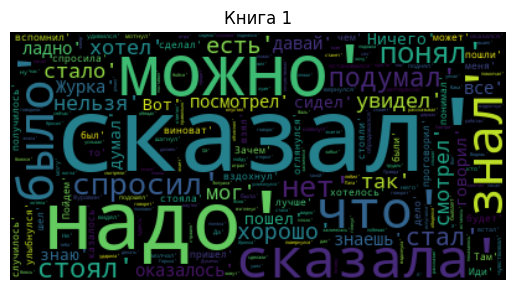

In [6]:
root_1 = root_find(doc1)
graphic(root_1, 1)

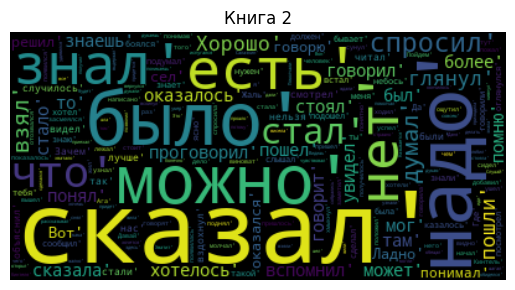

In [7]:
root_2 = root_find(doc2)
graphic(root_2, 2)

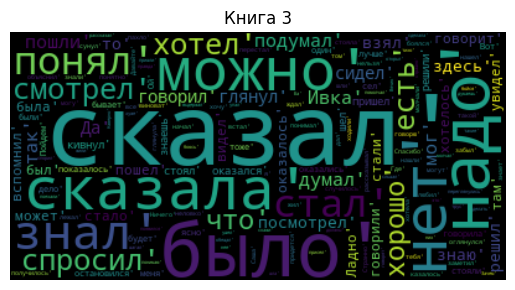

In [8]:
root_3 = root_find(doc3)
graphic(root_3, 3)

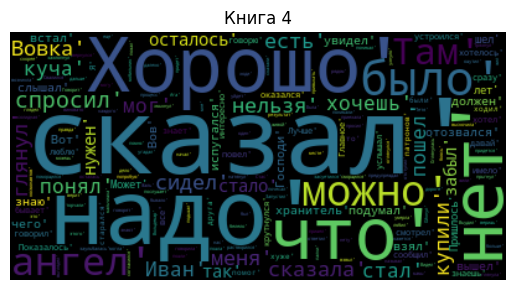

In [9]:
root_4 = root_find(doc4)
graphic(root_4, 4)

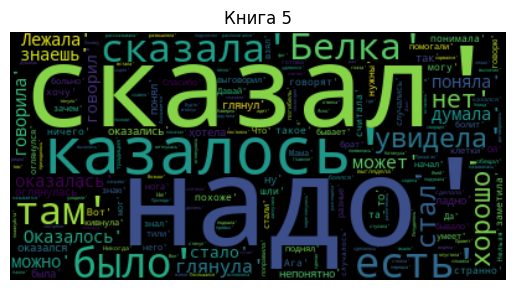

In [10]:
root_5 = root_find(doc5)
graphic(root_5, 5)

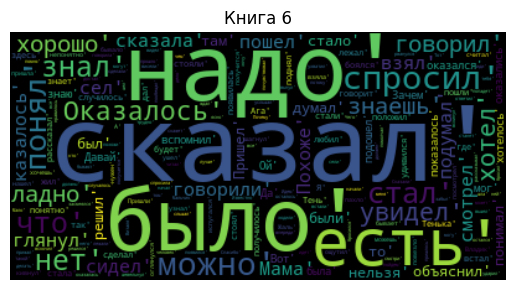

In [11]:
root_6 = root_find(doc6)
graphic(root_6, 6)

Можно заметить, что в каждой книге преобладают такие root слова, которые является часто используемыми в диалогах и прямой речи,<br> 
например такие как "сказал", "спросил", "говорил". Что логично, ведь книги Крапивина построены на прямой речи.

### `Подлежащие (nsubj)`

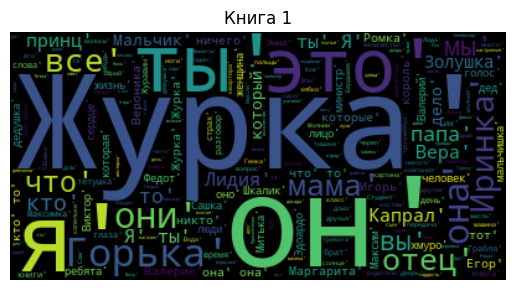

In [12]:
nsubj_1 = nsubj_find(doc1)
graphic(nsubj_1, 1)

Имена собственные: Журка, Иринка, Капрал, Маргарита, Лидия, Егор, Вера

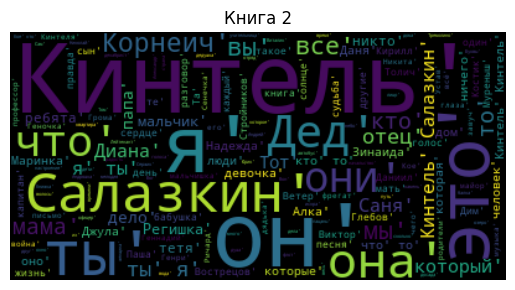

In [13]:
nsubj_2 = nsubj_find(doc2)
graphic(nsubj_2, 2)

Имена собственные: Корнеич, Вострецов, Салазкин, Алка

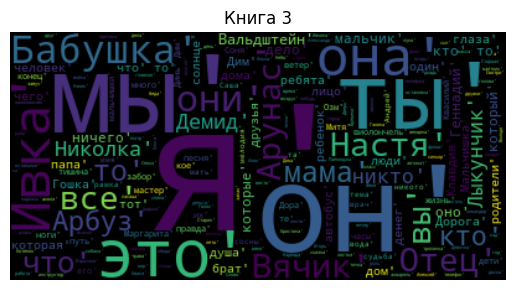

In [14]:
nsubj_3 = nsubj_find(doc3)
graphic(nsubj_3, 3)

Имена собственные: Ивка, Арунас, Валыдштейн

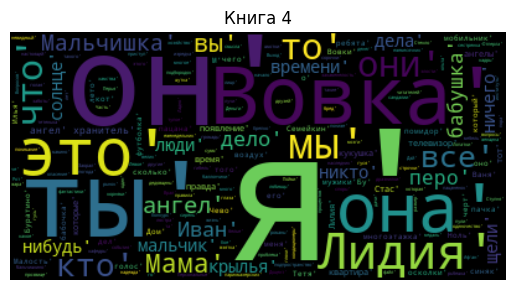

In [15]:
nsubj_4 = nsubj_find(doc4)
graphic(nsubj_4, 4)

Имена собственные: Лидия, Вовка, Иван

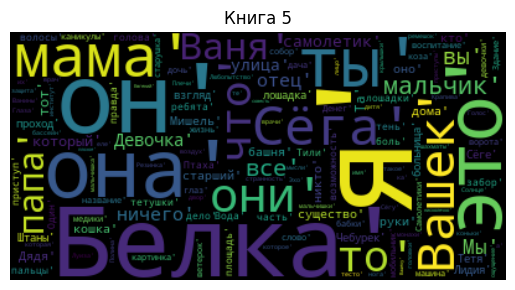

In [16]:
nsubj_5 = nsubj_find(doc5)
graphic(nsubj_5, 5)

Имена собственные: Сёга, Ваня, Мишель

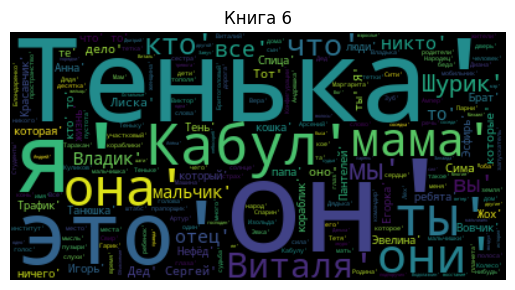

In [17]:
nsubj_6 = nsubj_find(doc6)
graphic(nsubj_6, 6)

Имена собственные: Виталя, Шурик, Владик

В подлежащих оказывается очень много имён собственных (а еще местоимений) - имён героев книги. Что, опять же, логично, ведь стиль Крапивина - диалоги.<br> 
Они оформлены через прямую речь, после которой указывается имя говорящего, из-за этого и появляется большое количество повторений имён персонажей.

In [18]:
# подсчёт предложений в тексте
def count_sentence(doc):
    sentence_number = 0
    for sent in doc.sents:
        sentence_number += 1
    return sentence_number

# в общий список количество предложений всех книг
sentence_counts = []
for doc in [doc1, doc2, doc3, doc4, doc5, doc6]:
    sentence_counts.append(count_sentence(doc))


### `Средняя длина предложений`

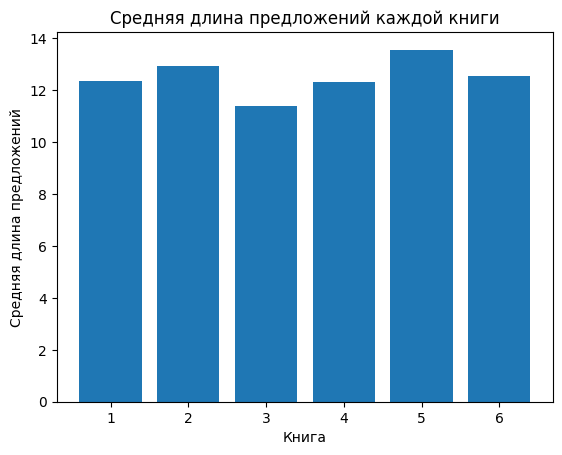

In [19]:
# длина предложений в среднем по тексту
def mean_sent_len(doc):
    sent_len = []
    for sent in doc.sents:
        sent_len.append(len(sent))
    mean_sentence_length = sum(sent_len) / len(sent_len)
    return mean_sentence_length

mean_lengths = []
for i, doc in enumerate([doc1, doc2, doc3, doc4, doc5, doc6]):
    mean_length = mean_sent_len(doc)
    mean_lengths.append(mean_length)

plt.bar(range(1, len(mean_lengths) + 1), mean_lengths)
plt.xlabel('Книга')
plt.ylabel('Средняя длина предложений')
plt.title('Средняя длина предложений каждой книги')
plt.show()


В разные года в разных книгах средняя длина предложений в целом не меняется, в пределах 11-14.

### `Вопросительные и восклицательные предложения`

In [20]:
# функция подсчёта
def q_e_sent_count(doc):
    question_count = 0
    exclamation_count = 0
    for sent in doc.sents:
        if sent.text.endswith('?'):
            question_count += 1
        elif sent.text.endswith('!'):
            exclamation_count += 1
    return question_count, exclamation_count

# для вывода в тексте и переменные для графика
question_counts = []
exclamation_counts = []
books = ['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6']

for i, doc in enumerate([doc1, doc2, doc3, doc4, doc5, doc6]):
    question_count, exclamation_count = q_e_sent_count(doc)
    print(f"В {i+1} книге:")
    print(f"{question_count} вопросительных предложений")
    print(f"{exclamation_count} восклицательных предложений \n")

    question_count, exclamation_count = q_e_sent_count(doc)
    question_counts.append(question_count)
    exclamation_counts.append(exclamation_count)

# в процентах
question_ratio = []
for i in range(0, 6):
    question_ratio.append(question_counts[i] / sentence_counts[i] * 100)

exclamation_ratio = []
for i in range(0, 6):
    exclamation_ratio.append(exclamation_counts[i] / sentence_counts[i] * 100)


В 1 книге:
542 вопросительных предложений
374 восклицательных предложений 

В 2 книге:
412 вопросительных предложений
552 восклицательных предложений 

В 3 книге:
313 вопросительных предложений
360 восклицательных предложений 

В 4 книге:
102 вопросительных предложений
59 восклицательных предложений 

В 5 книге:
61 вопросительных предложений
85 восклицательных предложений 

В 6 книге:
342 вопросительных предложений
413 восклицательных предложений 



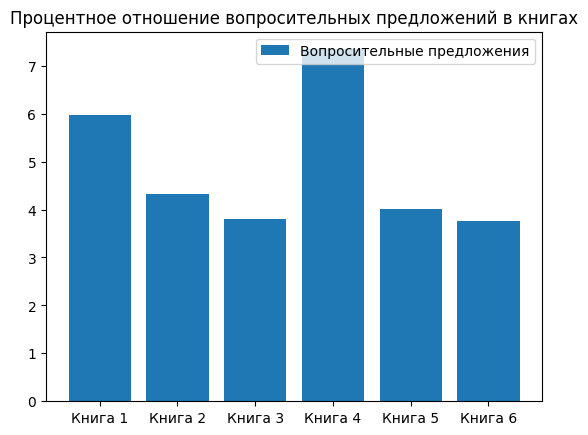

In [21]:
#график
plt.bar(books, question_ratio, label='Вопросительные предложения')
plt.title('Процентное отношение вопросительных предложений в книгах')
plt.legend()
plt.show()

В книге 4 резкий рост вопросительных предложений.

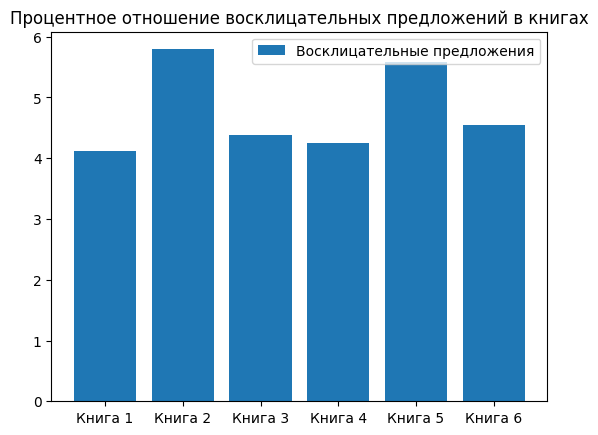

In [22]:
#график
plt.bar(books, exclamation_ratio, label='Восклицательные предложения')
plt.title('Процентное отношение восклицательных предложений в книгах')
plt.legend()
plt.show()

Книги 2 и 5 более эмоционально окрашены за счет восклицательных предложений.

### `Сложные и простые предложения`

In [23]:
# функция подсчёта сложных и простых
def simple_compound_count(doc):
    compound_count = 0
    simple_count = 0
    for sent in doc.sents:
        #  если больше одного подлежащего и больше одного связаного сказуемого
        if sum(1 for token in sent if token.dep_ == 'nsubj') > 1 and sum(1 for token in sent if token.dep_ == 'conj') > 1:
            compound_count += 1
        else:
            simple_count += 1
    return compound_count, simple_count

# на печать и для графика листы
compound_counts = []
simple_counts = []

for i, doc in enumerate([doc1, doc2, doc3, doc4, doc5, doc6]):
    compound_count, simple_count = simple_compound_count(doc)
    print(f"В {i+1} книге:")
    print(f"{simple_count} простых предложений")
    print(f"{compound_count} сложных предложений \n")

    compound_count, simple_count = simple_compound_count(doc)
    compound_counts.append(compound_count)
    simple_counts.append(simple_count)

# в процентах
simple_ratio = []
for i in range(0, 6):
    simple_ratio.append(simple_counts[i] / sentence_counts[i] * 100)

compound_ratio = []
for i in range(0, 6):
    compound_ratio.append(compound_counts[i] / sentence_counts[i] * 100)

В 1 книге:
8481 простых предложений
608 сложных предложений 

В 2 книге:
8989 простых предложений
542 сложных предложений 

В 3 книге:
7910 простых предложений
317 сложных предложений 

В 4 книге:
1310 простых предложений
79 сложных предложений 

В 5 книге:
1391 простых предложений
131 сложных предложений 

В 6 книге:
8635 простых предложений
463 сложных предложений 



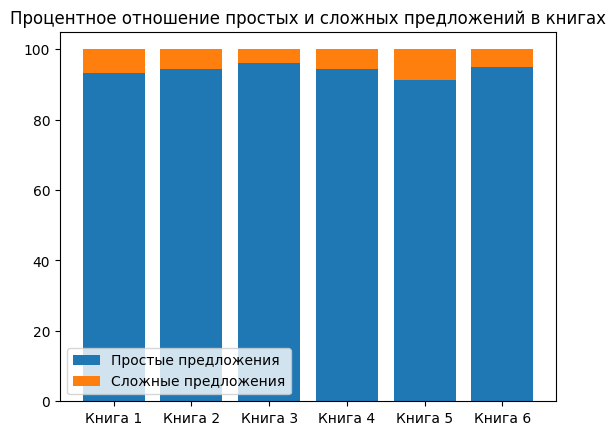

In [24]:
plt.bar(books, simple_ratio, label='Простые предложения')
plt.bar(books, compound_ratio, bottom=simple_ratio, label='Сложные предложения')

plt.title('Процентное отношение простых и сложных предложений в книгах')
plt.legend()
plt.show()

Процентное соотношение простых предложений от книги к книге почти одинаково. <br>
Рассмотрим сложные предложения поближе на отдельном графике ниже.

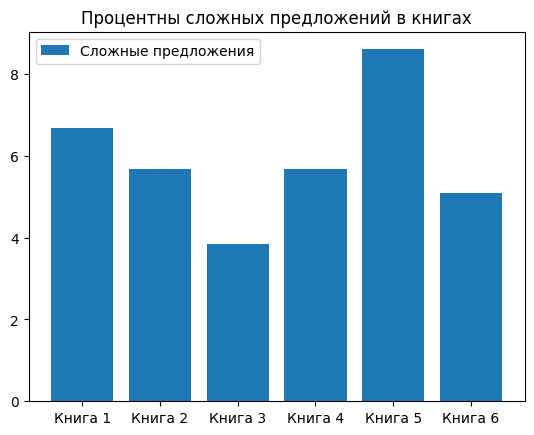

In [25]:
plt.bar(books, compound_ratio, label='Сложные предложения')
plt.title('Процентны сложных предложений в книгах')
plt.legend()
plt.show()

Книга 5 больше всего Толстой-alike из 6 представленных.